## Problem 1: Deform a shape

In this problem, we will practice part of what we learned in the image-to-3D lecture for shape deformation.

# CSE291E-FA22

### 1. Laplacian
Given a mesh $M=(V, E, F)$, we assume that the adjacency matrix is $A\in\mathbb{R}^{n\times n}$, $D\in\mathbb{R}^{n\times n}$ is a diagonal matrix where $D[i,i]$ is the degree of the $i$-th vertex. The Laplacian matrix is defined as $L=D-A$.

Prove that:

(a) $\sum_{(i,j)\in E}\|x_i-x_j\|^2=x^T L x$ for $x\in \mathbb{R}^n$. [1pt]

(b) $L\in\mathbb{S}^n_{+} $, i.e., $L$ is a symmetric and positive semi-definite matrix. [1pt]

(c) For the data matrix $P\in\mathbb{R}^{n\times 3}$ where each row corresponds to a point in $\mathbb{R}^3$, denote the columns of $P$ as $P=[x, y, z]$ and rows of $P$ as $P=[p_1^T; p_2^T; \ldots; p_n^T]$, show that 
$\sum_{(i,j)\in E}\|p_i-p_j\|^2=x^T L x+ y^T L y + z^T L z$. (hint: Use the conclusion from 1(a)) [1pt]

*Your solution*

(a) 
$$\begin{align}
\sum_{(i,j)\in E}\|x_i-x_j\|^2_2 &= \sum_{(i,j)\in E}(x_i-x_j)^2 \\
                               &=\bigg(\sum_{(i,j)\in E}x^2_i+\sum_{(i,j)\in E}x^2_j\bigg)-2\sum_{(i,j)\in E}x_i x_j \\
                               &=x^T D x - x^T A x \\
                               &=x^T L x
\end{align}$$

(b) $D$ is symmetric because it is a diagonal matrix. $A$ is symmetric because $A_{ij} = A_{ji}$ for an undirected graph. Therefore, $L = D - A$ is also symmetric. From the definition of positive semi-definite, a matrix $M$ is postive semi-definite if $x^T M x \geq 0$ for every nonzero real column vector $x$. From the conclusion of part (a), we can say $\sum_{(i,j)\in E}\|x_i-x_j\|^2=x^T L x$ is always non-negative due to the norm operation, implying $L\in \mathbb{S}^n_{+}$.

(c) The problem statement defines that $x$, $y$, $z$ are column vectors of $P\in\mathbb{R}^{n\times 3}$ and $p_k$ is the row vector of $P$. 
$$\begin{align}
\sum_{(i,j)\in E}\|p_i-p_j\|^2 &= \sum_{(i,j)\in E}(x_i-x_j)^2 + \sum_{(i,j)\in E}(y_i-y_j)^2 + \sum_{(i,j)\in E}(z_i-z_j)^2 \\
                               &= \sum_{(i,j)\in E}\|x_i-x_j\|^2 + \sum_{(i,j)\in E}\|y_i-y_j\|^2 + \sum_{(i,j)\in E}\|z_i-z_j\|^2 \\
                               &= x^T L x + y^T L y + z^T L z.
\end{align}$$

In [1]:
import numpy as np
import numpy.linalg as la
import sys

a = np.random.rand(1)
b = np.random.rand(1)
print(float(la.norm(a-b, 2)**2 - (a**2 + b**2 - 2*a*b)) < sys.float_info.epsilon)

True


C:\Users\GAUSS\AppData\Local\Temp\ipykernel_63620\1673470697.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(la.norm(a-b, 2)**2 - (a**2 + b**2 - 2*a*b)) < sys.float_info.epsilon)


### 2. Normalized Laplacian
Normalized Laplacian is defined as the normalized version of the Laplacian matrix above: $$L_{norm} = D^{-1} L$$

(a) Prove that the sum of each row of $L_{norm}$ is 0. [1pt]

*Your solution*

$L_{norm}=D^{-1}L = D^{-1}D - D^{-1}A = I - D^{-1}A$. The matrix inverse of $D$ is also a diagonal matrix where each diagonal entry on the i-th row is the reciprocal of the degree of node i . The sum of each i-th column of $A$ is the degrees of node i. Therefore, the row sum of $D^{-1}A$ will be 1. Thus, the sum of each row of $L_{norm}$ is 0. 

(b) The difference between a vertex $x$ and the average position of its 1-ring neighborhood is a quantity that provides interesting geometric insight of the shape. It can be shown that, 
$$x-\frac{1}{|N(x)|}\sum_{y_i\in N(x)} y_i \approx H \vec n \Delta A$$
for a good mesh, where $N(x)$ is the 1-ring neighorhood vertices of $x$ by the mesh topology, $H=\frac{1}{2}(\kappa_{min}+\kappa_{\max})$ is the mean curvature at $x$ (in the sense of the underlying continuous surface being approximated), $\vec n$ is the surface normal vector at $x$, and $\Delta A$ is a quantity proportional to the total area of the 1-ring fan (triangles formed by $x$ and vertices along the 1-ring).

Define $\Delta p_i := p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)} p_j$. Prove that $\Delta p_i = [L_{norm} P]_i$, where $P$ and $p_i$ are defined as in 1(c), and $[X]_i$ is to access the $i$-th row of $X$. [1pt]

*Your solution*

Assume a data matrix $P\in\mathbb{R}^{n\times 3}$ and $p_k$ is a row vector of $P$.

$$\begin{align}
[L_{norm}P]_i &= [L_{norm}]_i P \\
              &= [I-D^{-1}A]_i P \\
              &= [I P]_i - [D^{-1}A]_i P \\
              &= p_i - [D^{-1}A]_i P \\
\end{align}$$

In the case of a 3D mesh, when you multiply $D^{-1}A$ by $P$, it calculates the weighted average of the neighbors' positions. Then, we can write 

$$\begin{equation}
[D^{-1}A]_i=\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)}p_j
\end{equation}$$

where $N(p_i)$ finds the 1-ring neighborhood vertices of $p_i$.

Therefore, 

$$\begin{align}
\Delta p_i &= p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)}p_j \\
           &= p_i-[D^{-1}A]_i P \\ 
           &=[L_{norm}P]_i
\end{align}$$

QED.

### 3. Shape Deformation (extra credit)
Please load the source.obj and target.obj files using the trimesh library of Python, and optimize to deform the vertices of the source.obj to match target.obj. Plot the source object, target object, and deformed object. [5pt]

(a) Chamfer-only loss

*Your solution*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import open3d
import trimesh

import torch
import torch.optim as optim

from tqdm import tqdm
from chamfer import Chamfer_distance_torch

In [4]:
def draw_geometries(geoms):
    vis = open3d.visualization.Visualizer()
    vis.create_window()

    for geom in geoms:
        vis.add_geometry(geom)

    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))

    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    vis.destroy_window()

    plt.figure(figsize=(8, 6))
    plt.imshow(np.asarray(img))
    plt.axis('on')
    plt.show()

# http://www.open3d.org/docs/0.9.0/tutorial/Basic/working_with_numpy.html
def cvt_to_pcd(xyz, color):
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(xyz)
    
    # colors = np.array(list(colors) * len(xyz)).reshape(-1, 3)
    colors = np.zeros((len(xyz), 3))
    colors[np.arange(len(xyz)), :] = color
    # print(colors.shape)
    pcd.colors = open3d.utility.Vector3dVector(colors)
    
    return pcd

In [5]:
source = trimesh.load('source.obj')
target = trimesh.load('target.obj')

source_np = np.array(source.vertices)
target_np = np.array(target.vertices)
print(source_np.shape, target_np.shape)

# 1 x num of points x 3
source_torch = torch.tensor(source_np)[None, :, :]
target_torch = torch.tensor(target_np)[None, :, :]
print(source_torch.size(), target_torch.size())

source_torch.requires_grad = True
#source_torch = torch.nn.Parameter(source_torch)

optimizer = optim.Adam([source_torch], lr=1e-1)

(962, 3) (1502, 3)
torch.Size([1, 962, 3]) torch.Size([1, 1502, 3])


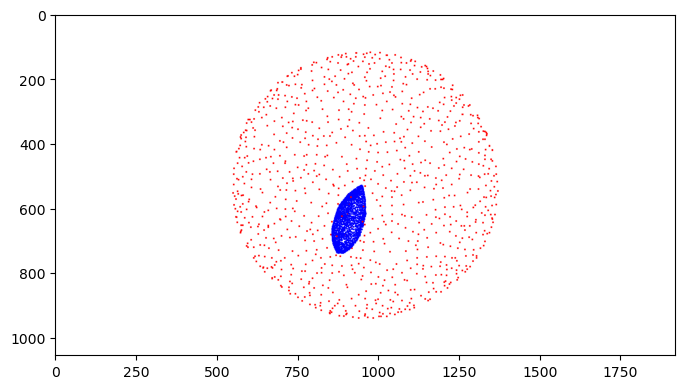

In [6]:
color_source = (1, 0, 0)
color_target = (0, 0, 1)
geoms = [cvt_to_pcd(source_np, color_source), cvt_to_pcd(target_np, color_target)]
draw_geometries(geoms)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 0, loss: 0.512144302935923


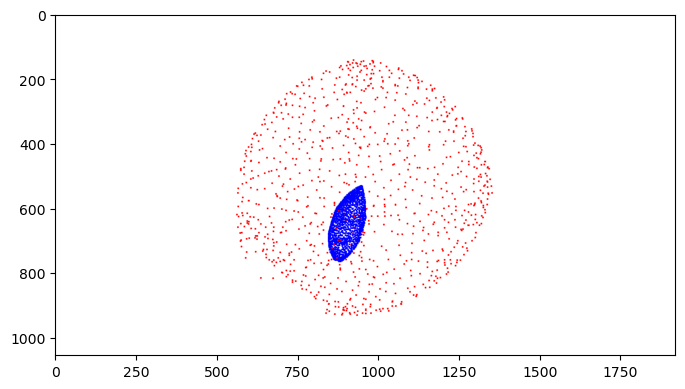

 10%|▉         | 99/1000 [00:01<00:09, 91.08it/s]

epoch: 100, loss: 5.435283310792256e-06


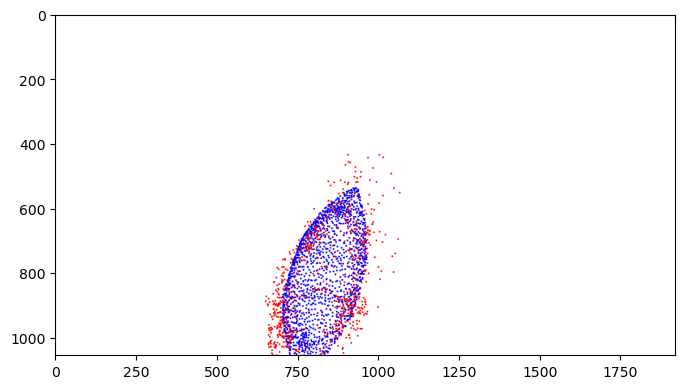

 20%|█▉        | 199/1000 [00:02<00:08, 91.15it/s]

epoch: 200, loss: 1.2331527611522901e-06


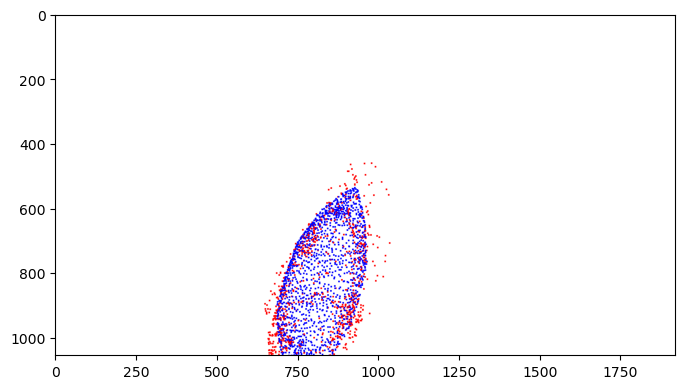

 30%|██▉       | 299/1000 [00:04<00:07, 92.50it/s]

epoch: 300, loss: 5.713097830445479e-07


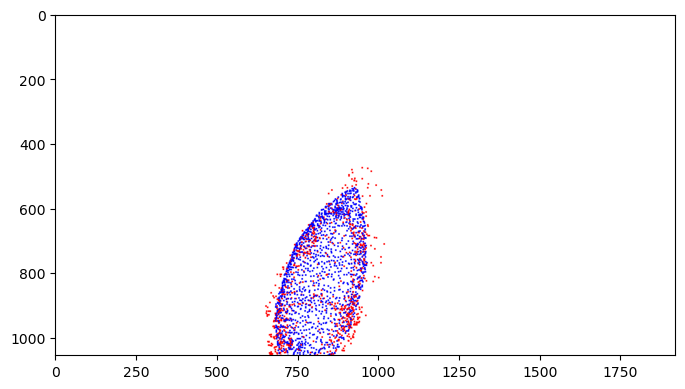

 40%|███▉      | 399/1000 [00:05<00:06, 92.77it/s]

epoch: 400, loss: 3.5222513945544953e-07


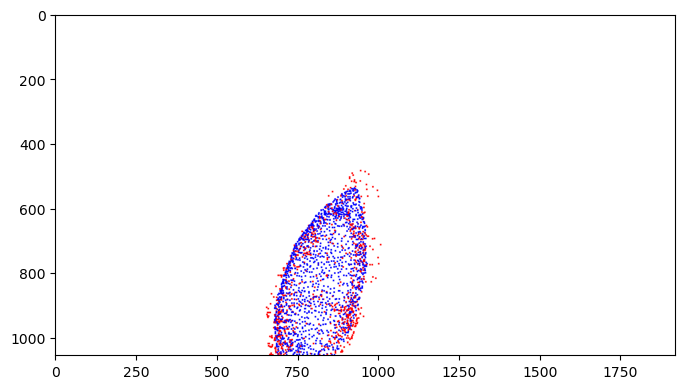

 50%|████▉     | 499/1000 [00:06<00:05, 91.61it/s]

epoch: 500, loss: 2.553841564444638e-07


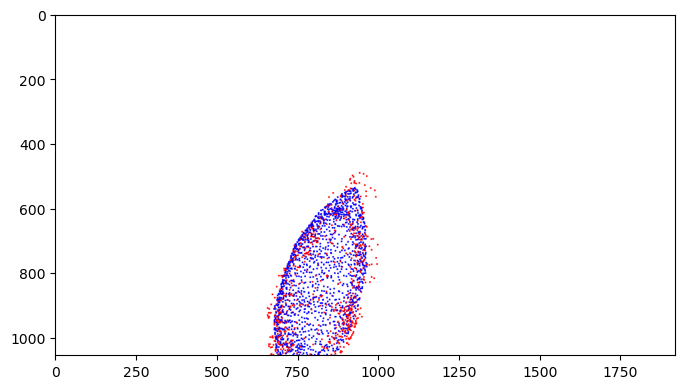

 60%|█████▉    | 598/1000 [00:07<00:04, 91.52it/s]

epoch: 600, loss: 2.0253387168920603e-07


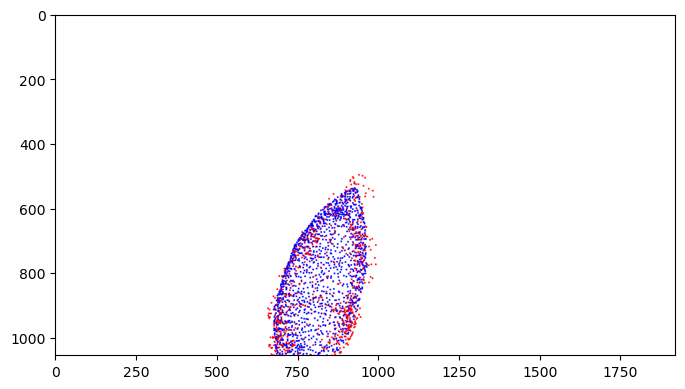

 70%|██████▉   | 698/1000 [00:09<00:03, 93.38it/s]

epoch: 700, loss: 1.7318174140717846e-07


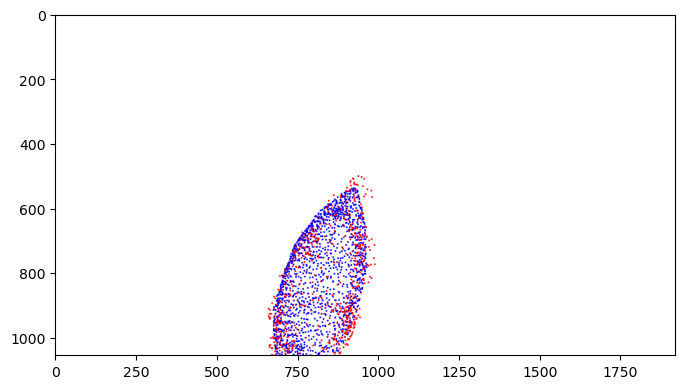

 80%|███████▉  | 798/1000 [00:10<00:02, 92.74it/s]

epoch: 800, loss: 1.5291272055786183e-07


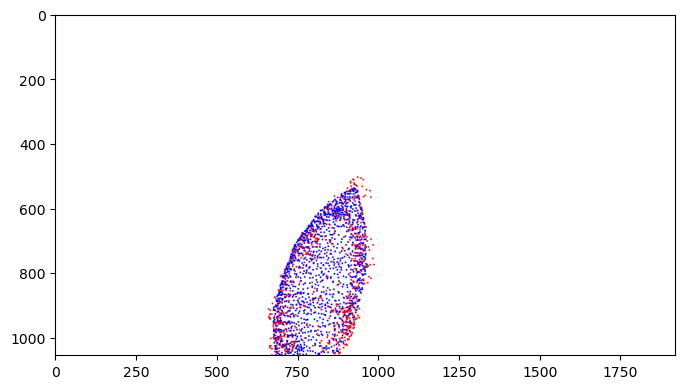

 90%|████████▉ | 898/1000 [00:11<00:01, 93.95it/s]

epoch: 900, loss: 1.3952467090715002e-07


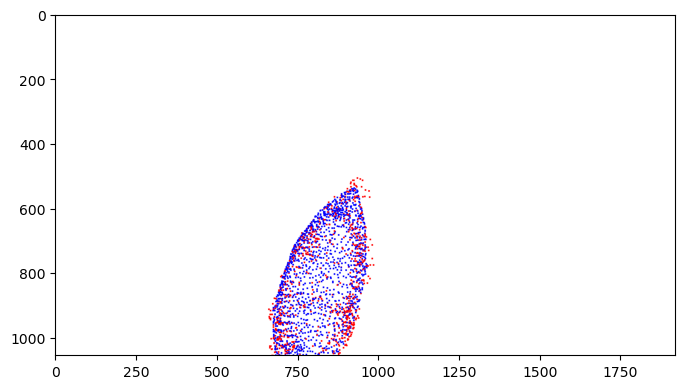

100%|█████████▉| 998/1000 [00:13<00:00, 93.43it/s]

epoch: 999, loss: 1.3001282240299186e-07


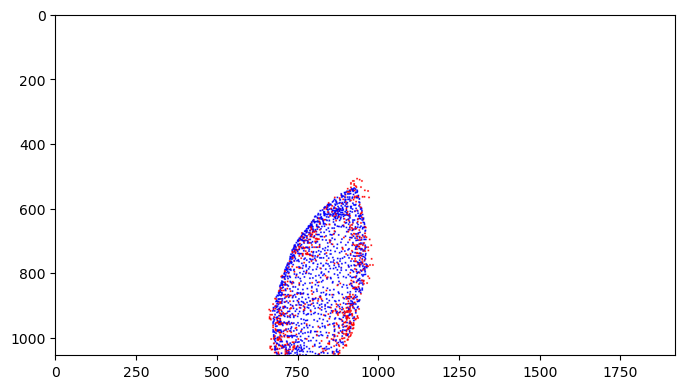

100%|██████████| 1000/1000 [00:13<00:00, 74.81it/s]


In [7]:
for epoch in tqdm(range(1000)):
    dist1, idx1, dist2, idx2 = Chamfer_distance_torch(source_torch, target_torch)
    loss = torch.mean(torch.square(dist1)) + torch.mean(torch.square(dist2))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0 or epoch == 999:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))
        source_np = source_torch.detach().numpy()[0]
        geoms = [cvt_to_pcd(source_np, color_source), cvt_to_pcd(target_np, color_target)]
        draw_geometries(geoms)

During the deformation process, the source points' (red) coordinates are altered iteratively to become closer to the target points (blue). The optimizer being used is the Adam optimizer (lr=0.1) with the chamfer distance loss, and it converges very early. However, the quality of the deformed mesh is not ideal. The deformed mesh is not uniformly spaced, meaning vertices are concentrated in the middle part but sparse on the tips of the target object. 

(b) Curvature and normal-based loss

*Your solution*

• First, we compute the ∆p ifor each vertex of the source and the target meshes using 2(b).

• Then, when we compute Chamfer-loss as in 3(a), we actually know about the correspondences across the source and target mesh vertex sets. For each pair of correspondences found in computing the Chamfer loss, we can use the $L_2$-norm square difference between the corresponding $\Delta p_i$ s’ as the loss. Note that this loss computation can be bidirectional (from source to target and from target to source).

In [8]:
from itertools import permutations

def L_norm(n, faces):
    A = np.zeros((n, n))
    for face in faces:
        for idx in permutations(face, 2):
            A[idx[0], idx[1]] = 1
    degrees = np.sum(A, axis=1)
    L_norm = np.identity(n) - np.diag(1/degrees) @ A
    # L_norm = np.diag(1/degrees) @ (np.diag(degrees) - A)
    return torch.tensor(L_norm)

In [9]:
source = trimesh.load('source.obj')
target = trimesh.load('target.obj')

source_np = np.array(source.vertices)
target_np = np.array(target.vertices)

# for chamfer loss
source_cd = torch.tensor(source_np) # points x 3
target_cd = torch.tensor(target_np) # points x 3

L_norm_source = L_norm(len(source_np), source.faces)
L_norm_target = L_norm(len(target_np), target.faces)
print(torch.sum(L_norm_target, axis=1) < sys.float_info.epsilon)

# for laplacian loss
source_dp = (L_norm_source @ source_cd)
target_dp = (L_norm_target @ target_cd)

source_cd.requires_grad = True
optimizer = optim.Adam([source_cd], lr=3e-2)

tensor([True, True, True,  ..., True, True, True])


  0%|          | 0/2000 [00:00<?, ?it/s]

epoch: 0, chamfer loss: 0.512144302935923, laplacian loss: 0.0007494601771432396


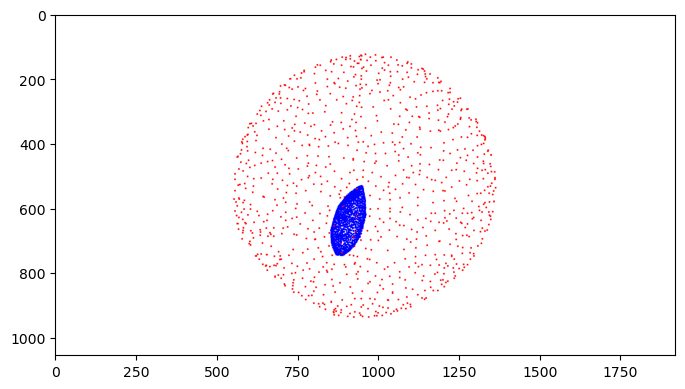

  5%|▍         | 98/2000 [00:01<00:33, 56.98it/s]

epoch: 100, chamfer loss: 9.891234666866669e-05, laplacian loss: 0.0001817907067325705


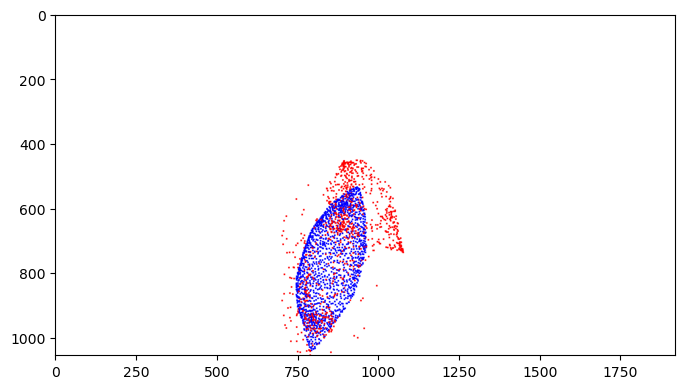

 10%|▉         | 197/2000 [00:04<00:34, 52.35it/s]

epoch: 200, chamfer loss: 3.1850685794440226e-05, laplacian loss: 9.726505773230177e-05


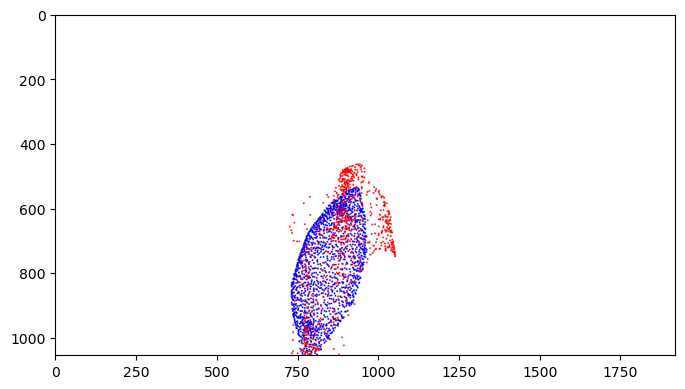

 15%|█▍        | 295/2000 [00:06<00:34, 49.56it/s]

epoch: 300, chamfer loss: 1.5063629420279317e-05, laplacian loss: 8.404484417700716e-05


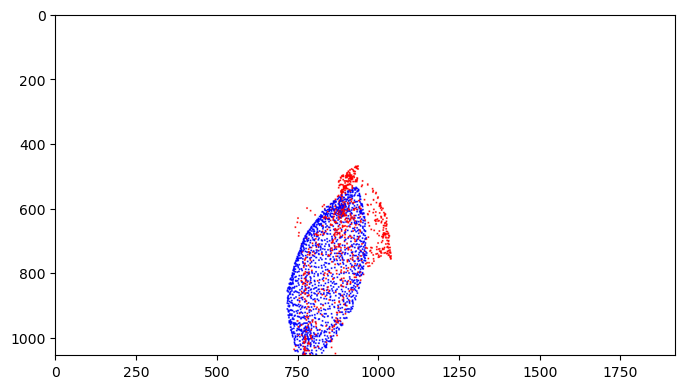

 20%|█▉        | 397/2000 [00:08<00:30, 52.77it/s]

epoch: 400, chamfer loss: 1.0159716943515622e-05, laplacian loss: 7.074433862536158e-05


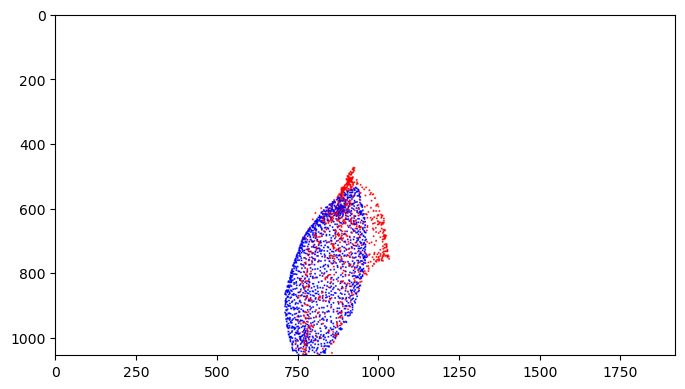

 25%|██▌       | 500/2000 [00:11<00:30, 49.28it/s]

epoch: 500, chamfer loss: 7.884964833724909e-06, laplacian loss: 6.269208813565916e-05


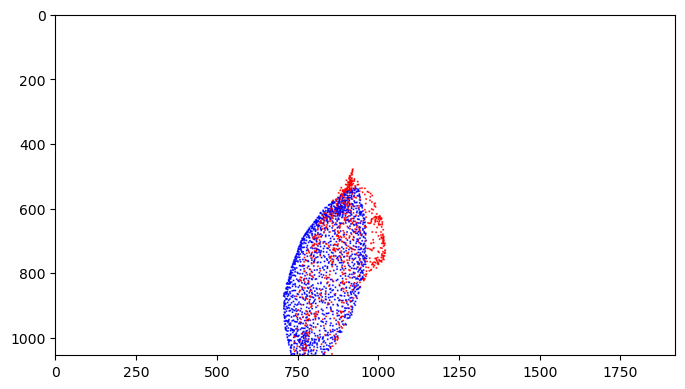

 30%|██▉       | 594/2000 [00:13<00:23, 59.49it/s]

epoch: 600, chamfer loss: 6.402586464169239e-06, laplacian loss: 5.617962636348691e-05


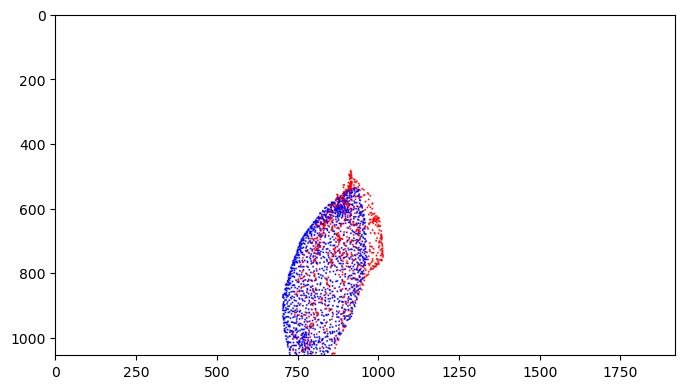

 35%|███▍      | 699/2000 [00:15<00:21, 59.91it/s]

epoch: 700, chamfer loss: 5.463753121567489e-06, laplacian loss: 5.386801398735859e-05


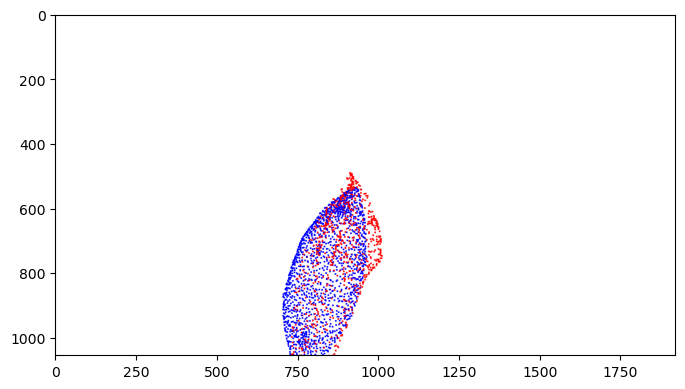

 40%|███▉      | 799/2000 [00:17<00:18, 65.76it/s]

epoch: 800, chamfer loss: 4.720287305462912e-06, laplacian loss: 5.08202381699718e-05


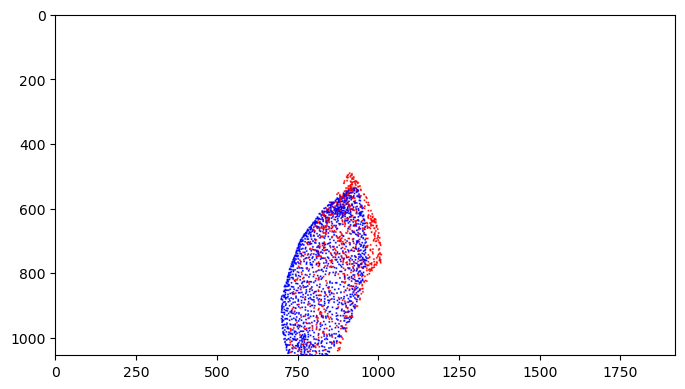

 45%|████▍     | 897/2000 [00:18<00:16, 65.22it/s]

epoch: 900, chamfer loss: 4.521502833451294e-06, laplacian loss: 5.2540718709494745e-05


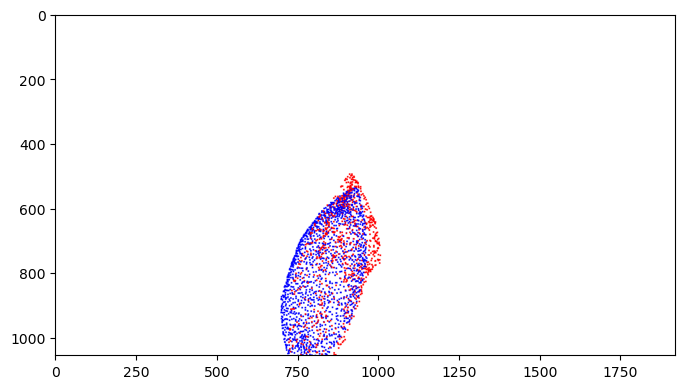

 50%|████▉     | 997/2000 [00:20<00:17, 56.38it/s]

epoch: 1000, chamfer loss: 4.229644924075864e-06, laplacian loss: 4.944227252694858e-05


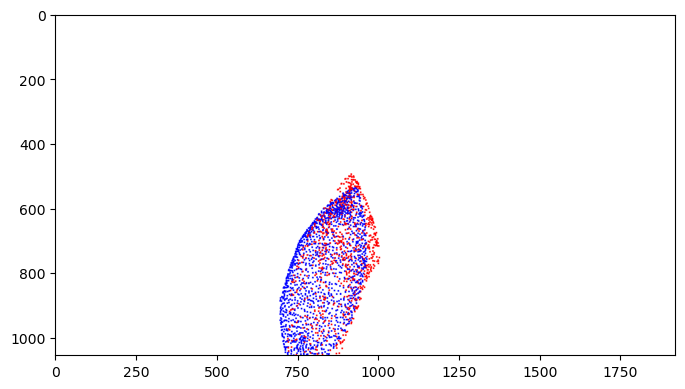

 55%|█████▍    | 1098/2000 [00:23<00:17, 52.63it/s]

epoch: 1100, chamfer loss: 3.928550311411239e-06, laplacian loss: 5.1495225444831187e-05


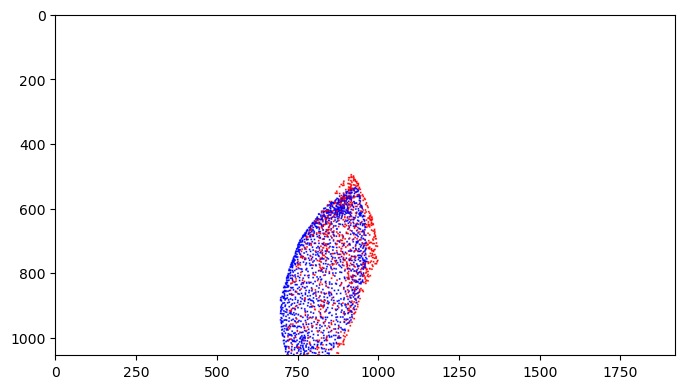

 60%|██████    | 1200/2000 [00:25<00:14, 56.41it/s]

epoch: 1200, chamfer loss: 3.5103896049004658e-06, laplacian loss: 5.227285192759507e-05


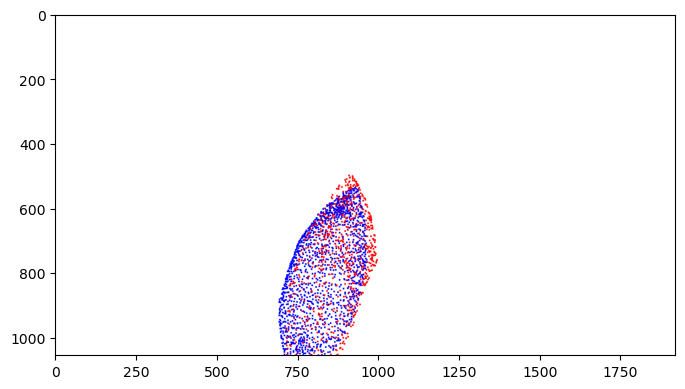

 65%|██████▍   | 1299/2000 [00:27<00:13, 53.74it/s]

epoch: 1300, chamfer loss: 3.2175345516847878e-06, laplacian loss: 5.586654850914035e-05


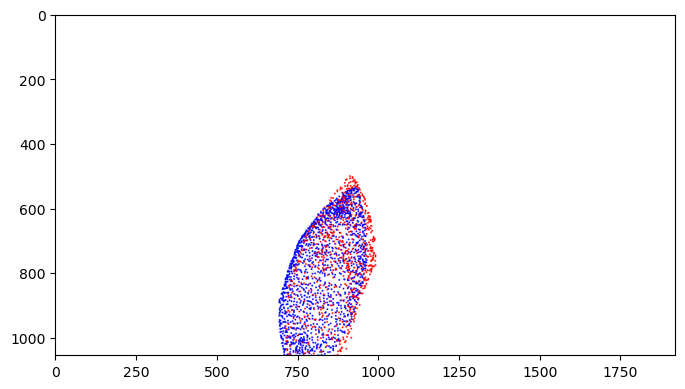

 70%|██████▉   | 1397/2000 [00:30<00:12, 48.18it/s]

epoch: 1400, chamfer loss: 2.778663732880719e-06, laplacian loss: 5.685914820785139e-05


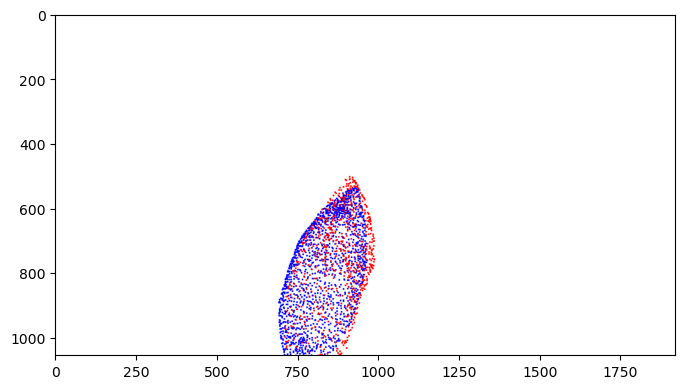

 75%|███████▌  | 1500/2000 [00:32<00:08, 56.16it/s]

epoch: 1500, chamfer loss: 2.4416207047140972e-06, laplacian loss: 5.530026088185089e-05


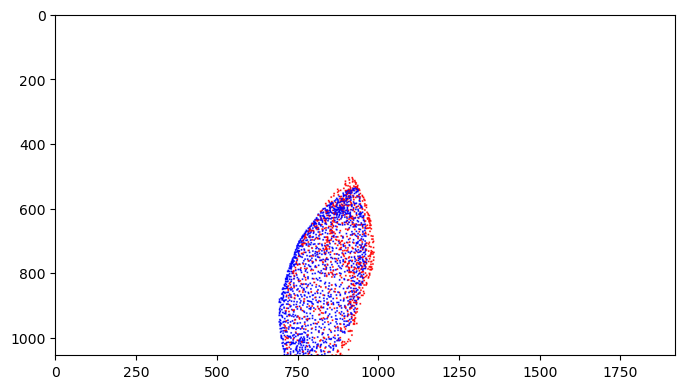

 80%|███████▉  | 1594/2000 [00:34<00:07, 55.99it/s]

epoch: 1600, chamfer loss: 2.1108323583733137e-06, laplacian loss: 5.003181351568019e-05


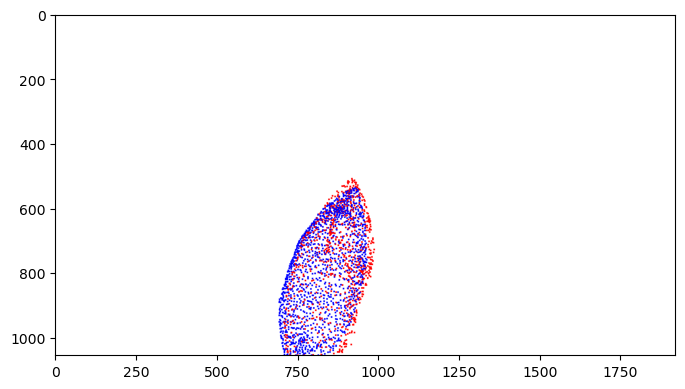

 85%|████████▍ | 1696/2000 [00:36<00:05, 57.30it/s]

epoch: 1700, chamfer loss: 1.51606698615611e-06, laplacian loss: 5.920776594056504e-05


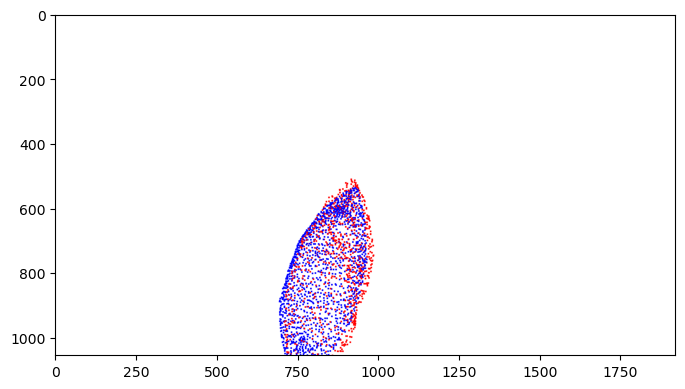

 90%|████████▉ | 1795/2000 [00:38<00:03, 54.93it/s]

epoch: 1800, chamfer loss: 1.2179083894024087e-06, laplacian loss: 5.860703566482376e-05


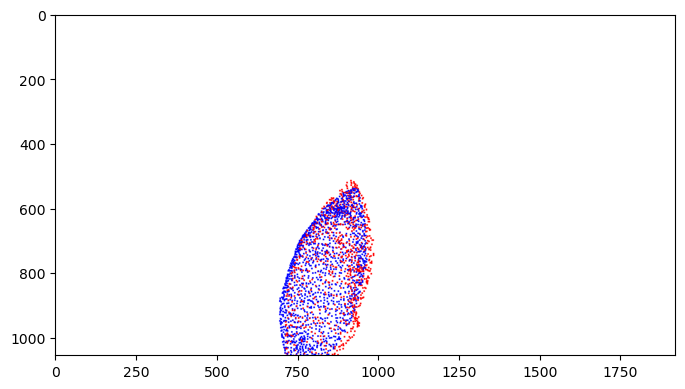

 95%|█████████▍| 1897/2000 [00:40<00:01, 60.98it/s]

epoch: 1900, chamfer loss: 1.1375480150644392e-06, laplacian loss: 5.2928346993468544e-05


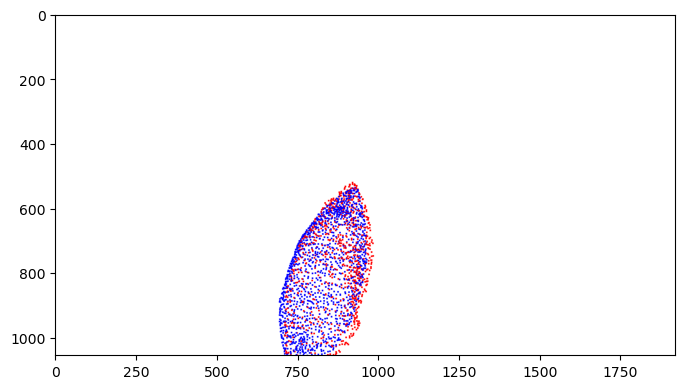

100%|█████████▉| 1994/2000 [00:42<00:00, 55.83it/s]

epoch: 1999, chamfer loss: 9.860960224234436e-07, laplacian loss: 5.836767383989271e-05


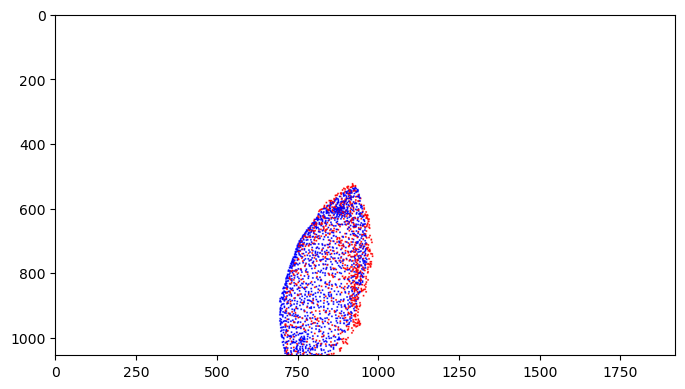

100%|██████████| 2000/2000 [00:43<00:00, 46.29it/s]


In [10]:
epochs = 2000
for epoch in tqdm(range(epochs)):
    # if epoch > 3000:
    #     optimizer = optim.Adam([source_cd], lr=1e-2)
    dist1, idx1, dist2, idx2 = Chamfer_distance_torch(source_cd.unsqueeze(0), target_cd.unsqueeze(0))
    loss_cd = torch.mean(torch.square(dist1)) + torch.mean(torch.square(dist2))
    
    source_dp = (L_norm_source @ source_cd)
    # print(idx1.shape, idx2.shape, source_dp.shape, target_dp.shape)
    NN_source = target_dp[idx1.squeeze(0)] # idx1 = for each point of source, index of the nearest neighbor in target
    NN_target = source_dp[idx2.squeeze(0)] # idx2 = for each point of target, index of the nearest neighbor in source
    
    assert NN_source.size() == source_dp.size()
    assert NN_target.size() == target_dp.size()
    
    loss_st = torch.mean(torch.square(NN_target - target_dp))
    loss_ts = torch.mean(torch.square(NN_source - source_dp))

    loss_lap = (loss_st + loss_ts) * 2
    loss = loss_cd + loss_lap
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0 or epoch == epochs - 1:
        print('epoch: {}, chamfer loss: {}, laplacian loss: {}'.format(epoch, loss_cd.item(), loss_lap.item()))
        geoms = [cvt_to_pcd(source_cd.detach().numpy(), color_source), cvt_to_pcd(target_np, color_target)]
        draw_geometries(geoms)

## Problem 2: ICP

In [ ]:
"""Visualization utilies."""

# You can use other visualization from previous homeworks, like Open3D
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm


def show_points(points):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[:, 0], points[:, 2], points[:, 1])
    

def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[:, 0], points1[:, 2], points1[:, 1])
    ax.scatter(points2[:, 0], points2[:, 2], points2[:, 1])

In [12]:
"""Load data."""

import trimesh
import numpy as np

source_pcd = trimesh.load("banana.source.ply").vertices
target_pcd = trimesh.load("banana.target.ply").vertices
gt_T = np.loadtxt("banana.pose.txt")

print(source_pcd.shape, target_pcd.shape, gt_T.shape)

(16384, 3) (16384, 3) (4, 4)


ICP steps:
0. initialization T = (R, t)
1. for each point in the source point cloud, find the nearest neighbor in the target point cloud
2. update the transformation by minimizing an objective function E(T) over the correspondence
3. repeat step 1 until converged

In [13]:
# https://igl.ethz.ch/projects/ARAP/svd_rot.pdf

def best_fit_transform(src, tgt):
    assert src.shape == tgt.shape
    src_centroid = np.mean(src, axis=0)
    tgt_centroid = np.mean(tgt, axis=0)
    src_centered = src - src_centroid
    tgt_centered = tgt - tgt_centroid
    
    M = src_centered.T @ tgt_centered
    U, S, Vt = la.svd(M)
    assert (np.isclose(U @ np.diag(S) @ Vt, M).all())
    
    sigma = np.identity(3)
    sigma[-1, -1] = la.det(Vt.T @ U.T)
        
    R = Vt.T @ sigma @ U.T
    t = tgt_centroid - R @ src_centroid
    
    T = np.identity(4)
    T[:3, :3] = R
    T[:3, 3] = t
    
    return R, t

src = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
tgt = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
R, t = best_fit_transform(src, tgt)
print(R, t)

[[-0.33333333  0.66666667  0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]] [-2.0000000e+00  8.8817842e-16  2.0000000e+00]


In [15]:
from sklearn.neighbors import NearestNeighbors

"""Implement your own ICP."""

def icp(source_pcd, target_pcd):
    """Iterative closest point.
    
    Args:
        source_pcd (np.ndarray): [N1, 3]
        target_pcd (np.ndarray): [N2, 3]
    
    Returns:
        np.ndarray: [4, 4] rigid transformation to align source to target.
    """
    # T = np.eye(4)
    T = np.random.rand(4, 4)
    T[-1, -1] = 0
    
    # Implement your own algorithm here.
    
    for _ in tqdm(range(10000)):
    
        nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
        nbrs.fit(source_pcd)
        indices = nbrs.kneighbors(target_pcd, return_distance=False)
        indices = indices.reshape(-1)
        
        R, t = best_fit_transform(source_pcd, target_pcd[indices])
        source_pcd = (R @ source_pcd.T).T + t
        
        T = np.identity(4)
        T[:3, :3] = R
        T[:3, 3] = t
    return T

In [16]:
"""Metric and visualization."""

def compute_rre(R_est: np.ndarray, R_gt: np.ndarray):
    """Compute the relative rotation error (geodesic distance of rotation)."""
    assert R_est.shape == (3, 3), 'R_est: expected shape (3, 3), received shape {}.'.format(R_est.shape)
    assert R_gt.shape == (3, 3), 'R_gt: expected shape (3, 3), received shape {}.'.format(R_gt.shape)
    # relative rotation error (RRE)
    rre = np.arccos(np.clip(0.5 * (np.trace(R_est.T @ R_gt) - 1), -1.0, 1.0))
    return rre


def compute_rte(t_est: np.ndarray, t_gt: np.ndarray):
    assert t_est.shape == (3,), 't_est: expected shape (3,), received shape {}.'.format(t_est.shape)
    assert t_gt.shape == (3,), 't_gt: expected shape (3,), received shape {}.'.format(t_gt.shape)
    # relative translation error (RTE)
    rte = np.linalg.norm(t_est - t_gt)
    return rte


# Visualization
T = icp(source_pcd, target_pcd)
rre = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
rte = compute_rte(T[:3, 3], gt_T[:3, 3])
print(f"rre={rre}, rte={rte}")
compare_points(source_pcd @ T[:3, :3].T + T[:3, 3], target_pcd)

100%|██████████| 10000/10000 [04:30<00:00, 37.02it/s]


rre=88.80422846220065, rte=1.9815055265936423


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [17]:
print(compute_rre(T[:3, :3], gt_T[:3, :3]))
print(compute_rte(T[:3, 3], gt_T[:3, 3]))

1.5499261763586623
1.9815055265936423
